# Face recognition

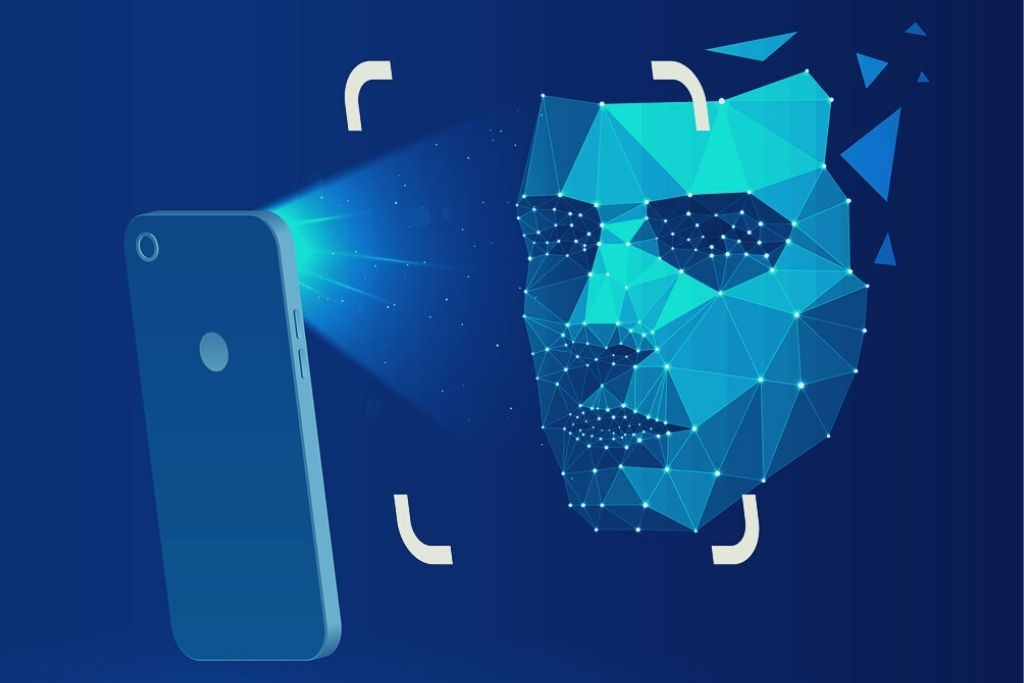

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
import os

# <font color='red'>1 - Face detection : le mtcnn</font> 

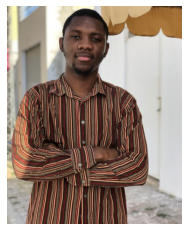

In [2]:
filename = "img.jpg"
image = mpimg.imread(filename)
plt.imshow(image)
plt.axis("off")
plt.show()

In [3]:
image.shape

(406, 326, 3)

In [4]:
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(image)

# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
# bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height

In [5]:
results

[{'box': [108, 22, 72, 96],
  'confidence': 1.0,
  'keypoints': {'left_eye': (129, 58),
   'right_eye': (164, 61),
   'nose': (146, 75),
   'mouth_left': (128, 94),
   'mouth_right': (160, 96)}}]

In [6]:
keypoints = results[0]['keypoints']

start_point = (x1, y1) 
end_point = (x2,y2)
color = (0, 255,0 )
thickness = 2
image_with_box = cv2.rectangle(image, start_point, end_point, color, thickness)

image_with_box = cv2.circle(image_with_box,(keypoints['left_eye']), 2, color, thickness)
image_with_box = cv2.circle(image_with_box,(keypoints['right_eye']), 2, color, thickness)
image_with_box = cv2.circle(image_with_box,(keypoints['nose']), 2, color, thickness)
image_with_box = cv2.circle(image_with_box,(keypoints['mouth_left']), 2, color, thickness)
image_with_box = cv2.circle(image_with_box,(keypoints['mouth_right']), 2, color, thickness)

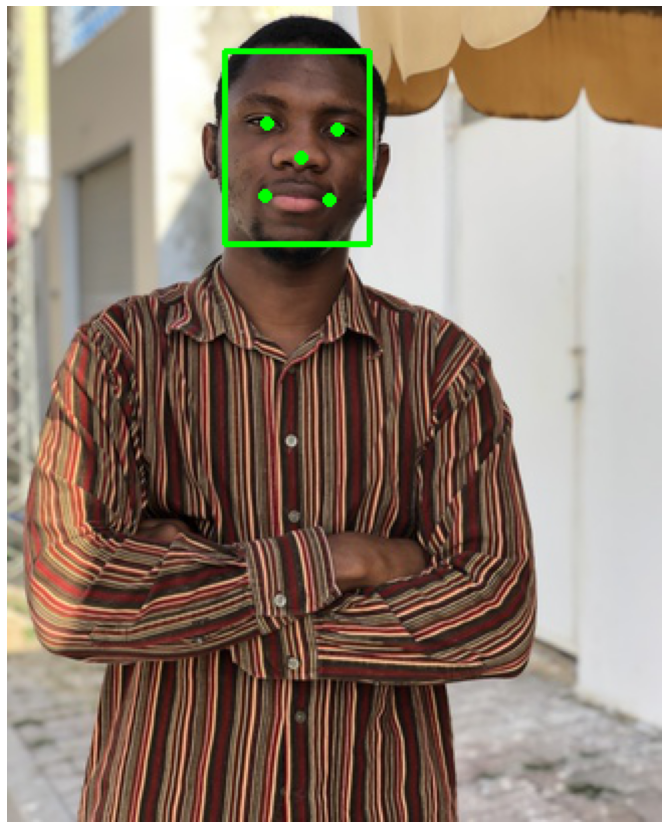

In [9]:
plt.figure(figsize = (18,15))
plt.imshow(image_with_box)
plt.axis("off")
plt.show()

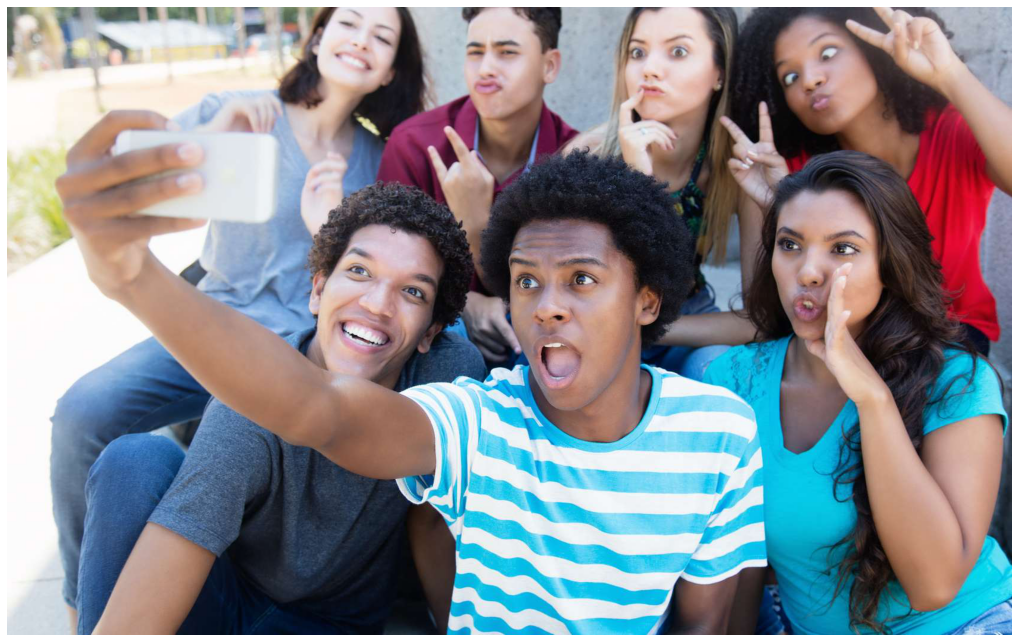

In [10]:
selfie = "selfie.jpg"
selfie = mpimg.imread(selfie)

plt.figure(figsize = (18,15))
plt.imshow(selfie)
plt.axis("off")
plt.show()

In [11]:
results = detector.detect_faces(selfie)

In [12]:
for bounding in results:
    # extract the bounding box from the first face
    x1, y1, width, height = bounding['box']
    
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    keypoints = bounding['keypoints']

    start_point = (x1, y1) 
    end_point = (x2,y2)
    color = (0, 255,0 )
    thickness = 2
    image_with_box = cv2.rectangle(selfie, start_point, end_point, color, thickness)

    image_with_box = cv2.circle(image_with_box,(keypoints['left_eye']), 2, color, thickness)
    image_with_box = cv2.circle(image_with_box,(keypoints['right_eye']), 2, color, thickness)
    image_with_box = cv2.circle(image_with_box,(keypoints['nose']), 2, color, thickness)
    image_with_box = cv2.circle(image_with_box,(keypoints['mouth_left']), 2, color, thickness)
    image_with_box = cv2.circle(image_with_box,(keypoints['mouth_right']), 2, color, thickness)
    
    

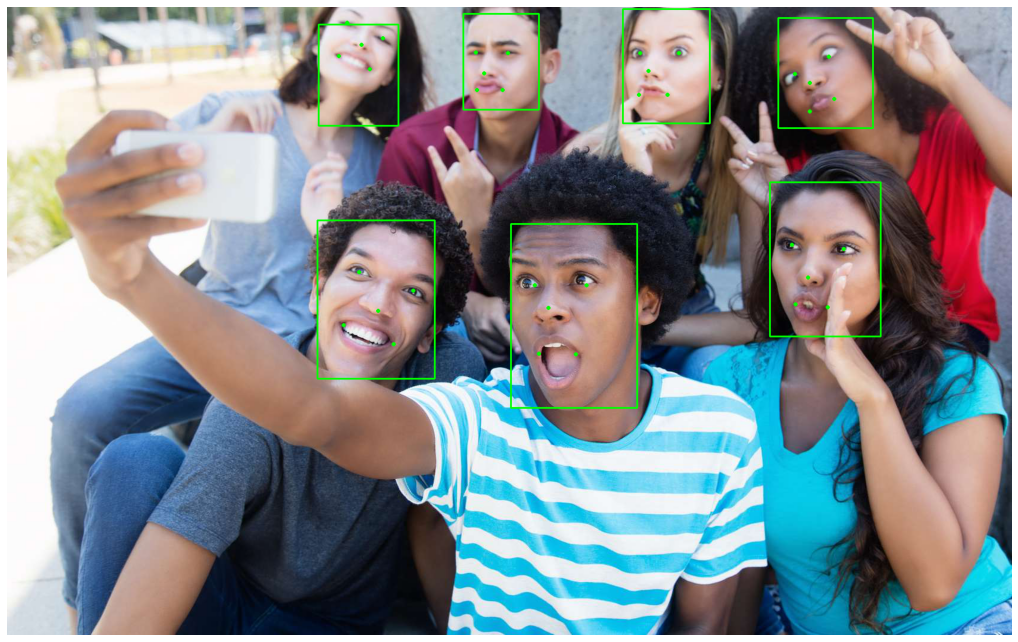

In [13]:
plt.figure(figsize = (18,15))
plt.imshow(image_with_box)
plt.axis("off")
plt.show()

## écrivons une fonction qui nous retourne le visage

In [14]:

def extract_face(filename, required_size=(160, 160)):
    """
    fonction permettant d'extraire une face à partir d'une photo et de resizer la face pour qu'elle soit utilisée
    par le facenet
    """
    # load image from file
    image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    
    # create the mtcnn detector
    detector = MTCNN()
    
    # detect faces in the image
    results = detector.detect_faces(image)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = image[y1:y2, x1:x2]
    
    # resize pixels to the model size(facenet)
    face_resize = cv2.resize(face,required_size)
    return face_resize

In [15]:
face_steve = extract_face(filename)

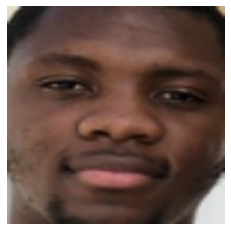

In [16]:
plt.imshow(face_steve)
plt.axis("off")
plt.show()

In [17]:
face_steve.shape

(160, 160, 3)

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)


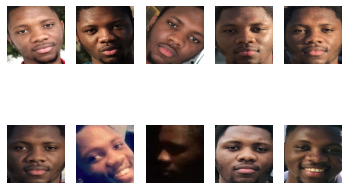

In [17]:
# specify folder to plot
folder = 'dataset/train/steve/'
i = 1
filenames = os.listdir(folder)[:10]
# enumerate files
for filename in filenames:

    path = folder + filename
    # get face
    face = extract_face(path)
    print(i, face.shape)
    # plot
    plt.subplot(2, 5, i)
    plt.axis('off')
    plt.imshow(face)
    i += 1
plt.show()

## Chargeons notre dataset

In [18]:
# charger les images de tout un repertoire dans une liste
def load_faces(directory):
    faces = list()
    
    for filename in os.listdir(directory):

        path = directory + filename
        face = extract_face(path)
        faces.append(face)
    return faces
 
#charger un repertoire contenant plusieurs repertoires d'images labelisées
def load_dataset(directory):
    x, y = list(), list()
    
    #pour chaque personne (label)
    for subdir in os.listdir(directory):
    
        path = directory + subdir + '/'
       
        
        #on s'assure que path est bien un dossier et non un fichier
        if os.path.isdir(path):
            
            #on charge toutes les faces avec la fonction lod_faces
            faces = load_faces(path)
            
            #on crée maintenant les labels
            labels = [subdir for i in range(len(faces))]
            
            #petites infos
            print("nous avons chargé {} photos de {}".format(len(faces),subdir))
            
            #ajouter nos face à la liste final
            x.extend(faces)
            y.extend(labels)
    return np.asarray(x), np.asarray(y)

In [37]:
# load train dataset
x_train, y_train = load_dataset('dataset/train/')
print(x_train.shape, y_train.shape)

# load test dataset
x_test, y_test = load_dataset('dataset/val/')
print(x_test.shape, y_test.shape)

#enregistrons nos données sous forme compressée
#nous utiliserons np.load pour quitter de la forme compressée à la forme normale
np.savez_compressed('faces-dataset.npz', x_train, y_train, x_test, y_test)

httpcsvkmeuaeccjpg.jpg

(170, 115, 3)
httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg

(250, 164, 3)
httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg

(314, 236, 3)


httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg

(297, 236, 3)
httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg

(354, 236, 3)


httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg

(314, 236, 3)
httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg

(244, 236, 3)


httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg

(335, 220, 3)
httptrwebimgacstanetcxbdddmediasnmediajpg.jpg

(213, 160, 3)
httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg

(140, 140, 3)


httpwwwallposterscomimagesPostersPFjpg.jpg

(350, 243, 3)
httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg

(185, 150, 3)


httpwwwhillsindcomstorebenjpg.jpg

(330, 230, 3)
httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg

(224, 300, 3)
nous avons chargé 14 photos de ben_afflek
httpftqncomymusicLxZeltonjohnjpg.jpg

(202, 300, 3)


httpiamediaimdbcomimagesMMVBMTAxNDUMzUwOTdeQTJeQWpwZBbWUMDUOTAyNTIVUXCRALjpg.jpg

(317, 214, 3)
httpimagesmtvcomurimgidfiledocrootvhcomsitewideflipbooksimgdailyjpgenlargefalsemattetruematteColorblackquality.jpg

(240, 320, 3)


httpimggalpmdstaticnetfithttpAFFwwwEgalaEfrFvarFgalFstorageFimagesFmediaFmultiuploaddufevrierFeltonjohnFfreFRFeltonjohnEjpgxqualityeltonjohnjpg.jpg

(203, 360, 3)
httpmediacacheecpinimgcomxffeffbcefjpg.jpg

(353, 236, 3)
httpmediapopsugarassetscomfilescbffewltonjpg.jpg

(320, 240, 3)


httpsdfrpwlycscloudfrontnetdeltonjohnjpg.jpg

(267, 267, 3)
httpspmctvlinefileswordpresscomeltonjohnjpg.jpg

(240, 300, 3)
httpssmediacacheakpinimgcomxfcfcbaeaeddabbjpg.jpg

(355, 236, 3)


httpssmediacacheakpinimgcomxfecfecaefaadfebejpg.jpg

(300, 236, 3)
httpssmediacacheakpinimgcomxfefdacfbfdeadajpg.jpg

(353, 236, 3)


httpsticketmnettmenusdamabbacdaebeafdbbCUSTOMjpg.jpg

(225, 305, 3)
httpsuploadwikimediaorgwikipediacommonsthumbEltonJohninsjpgpxEltonJohninsjpg.jpg

(165, 220, 3)
httpwwwdeadlinecomvimgnetwpcontentuploadseltonjpg.jpg

(212, 238, 3)


httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxEltonJohnJRjpg.jpg

(300, 300, 3)
httpwwwjohnpauljonesarenacomeventimagesEltonCalendarVjpg.jpg

(200, 255, 3)
httpwwwlautdeEltonJohneltonjohnjpg.jpg

(209, 292, 3)


nous avons chargé 17 photos de elton_john
httpgraphicsnytimescomimagessectionmoviesfilmographyWireImagejpg.jpg

(244, 161, 3)
httpikinjaimgcomgawkermediaimageuploadsWmIuhdsrcedidjpgjpg.jpg

(280, 300, 3)


httpimagescontactmusiccomnewsimagesjerryseinfeldjpg.jpg

(300, 300, 3)
httpimagesrottentomatoescomimagesspotlightsnewsjerryseinfeldjpg.jpg

(206, 160, 3)


httpimgthedrumcomsfspublicnewstmpjerryseinfeldjpg.jpg

(317, 214, 3)
httpimgtimeincnetpeopleinewsjerryseinfeldjpg.jpg

(240, 320, 3)


httpmediapopsugarassetscomfilesusersxlargejpg.jpg

(320, 240, 3)
httppfodcompchannelslegacyprofilejerryseinfeldpodcastjpg.jpg

(280, 230, 3)


httpsmedialivenationcomartiststapjpg.jpg

(225, 305, 3)
httpsrobertaccetturacomwpcontentuploadsjerryseinfeldheadshotjpg.jpg

(272, 245, 3)
httpstatictherichestimagescomcdncwpcontentuploadsJerrySeinfeldjpg.jpg

(216, 216, 3)


httpsticketmnettmenusdbimagesajpg.jpg

(225, 305, 3)
httpsuploadwikimediaorgwikipediacommonsthumbbJerrySeinfeldjpgpxJerrySeinfeldjpg.jpg

(340, 220, 3)
httpsuswestamazonawscomblogsprodmediausuploadsJerrySeinfeldkidsxjpg.jpg

(200, 300, 3)


httpswwwticketscomuploadsartistsjerryseinfeldbilletsjpg.jpg

(200, 200, 3)
httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxjerryseinfeldjulialouisdreyfusjwjpg.jpg

(300, 300, 3)


httpwwwnndbcompeoplejerryseinfeldaujpg.jpg

(260, 214, 3)
httpwwwpictureszimbiocomgpJerrySeinfeldJessicaSeinfeldmarriedBczSipMdNMQljpg.jpg

(320, 240, 3)
httpwwwpsychiatrictimescomsitesdefaultfilesimagesmediaPTMofficSeinfeldjpg.jpg

(285, 220, 3)


httpwwwslatecomcontentdamslateblogsbrowbeatseinfeldjpgCROParticlemediumjpg.jpg

(250, 250, 3)
httpwwwwatchidcomsitesdefaultfilesuploadsightingBreitlingwatchJerrySeinfeldjpg.jpg

(300, 300, 3)


nous avons chargé 21 photos de jerry_seinfeld
httpiamediaimdbcomimagesMMVBMTANDQNTAxNDVeQTJeQWpwZBbWUMDIMjQOTYVUXCRALjpg.jpg

(317, 214, 3)
httpimagegaladevcmseamadonnaprivatdetektivsquaretopsquarejpgv.jpg

(300, 300, 3)
httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg

(250, 250, 3)


httpmediavoguecomrwblondesdarkbrowsmadonnajpg.jpg

(209, 165, 3)
httpresizeparismatchladmediafrrffffffcentermiddleimgvarnewsstorageimagesparismatchpeopleazmadonnafreFRMadonnajpg.jpg

(358, 241, 3)


httpssmediacacheakpinimgcomxaaeaaeecccaedfebdbjpg.jpg

(282, 236, 3)
httpssmediacacheakpinimgcomxafafedebcbjpg.jpg

(380, 236, 3)


httpssmediacacheakpinimgcomxdcfdcfedfaedadjpg.jpg

(330, 236, 3)
httpssmediacacheakpinimgcomxfeebfdccajpg.jpg

(305, 236, 3)
httpssmediacacheakpinimgcomxffabffabbbcfbceaedjpg.jpg

(333, 236, 3)


httpssmediacacheakpinimgcomxffeabacaaejpg.jpg

(354, 236, 3)
httpssmediacacheakpinimgcomxffecfafddjpg.jpg

(320, 236, 3)


httpssvagalumecommadonnaimagesmadonnajpg.jpg

(223, 190, 3)
httpsuploadwikimediaorgwikipediacommonsMadonnathAnnualGoldenGlobesAwardscroppedjpg.jpg

(315, 214, 3)
httpsuploadwikimediaorgwikipediacommonsthumbaaMadonnaatthepremiereofIAmBecauseWeArejpgpxMadonnaatthepremiereofIAmBecauseWeArejpg.jpg

(297, 220, 3)


httpuploadwikimediaorgwikipediacommonsthumbaMadonnaRotterdamjpgpxMadonnaRotterdamjpg.jpg

(355, 220, 3)
httpwwwbeastiemaniacomwhoismadonnamadonnajpg.jpg

(297, 292, 3)


httpwwwblackdogfilmscomwordpresswpcontentuploadsmadonnacelebrationxjpg.jpg

(197, 350, 3)
httpwwwetonlinecomphotomadonnabdayjpg.jpg

(200, 200, 3)


nous avons chargé 19 photos de madonna
httpgonetworthcomwpcontentuploadsthumbsjpg.jpg

(295, 295, 3)
httpgraphicsnytimescomimagesmagazinekalingkalingarticleInlinejpg.jpg

(254, 190, 3)
httpimagesnymagcomimagesdailymindykalingxjpg.jpg

(190, 190, 3)


httpmediaonsugarcomfilesbabaaaaaMindyInterviewxxxlargejpg.jpg

(350, 243, 3)
httppixelnymagcomimgsfashiondailymindykalingwhjpg.jpg

(368, 245, 3)


httpsamazonawscomkidzworldphotoimagesbccdddaaadgallerymindykalinggalleryjpg.jpg

(233, 350, 3)
httpsimagesnasslimagesamazoncomimagesIAQdwKvFILUXjpg.jpg

(358, 250, 3)


httpsimgbuzzfeedcombuzzfeedstaticstaticcampaignimageswebdradorableetsyitemsallmindykalingfansneedbigjpg.jpg

(236, 355, 3)
httpssmediacacheakpinimgcomxafaffbbbbdbcbdddjpg.jpg

(335, 236, 3)
httpssmediacacheakpinimgcomxbabafeacbaaacabffjpg.jpg

(345, 236, 3)


httpssmediacacheakpinimgcomxbbfcbdedfbfdbjpg.jpg

(380, 236, 3)
httpssmediacacheakpinimgcomxcccccddbbfedabjpg.jpg

(354, 236, 3)


httpssmediacacheakpinimgcomxccccdabeaadjpg.jpg

(325, 236, 3)
httpssmediacacheakpinimgcomxededbebccdajpg.jpg

(346, 236, 3)
httpssmediacacheakpinimgcomxeedccadejpg.jpg

(315, 236, 3)


httpsuploadwikimediaorgwikipediacommonsthumbMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpgpxMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpg.jpg

(346, 220, 3)
httpwwwadweekcomfilesimagecachenodeinlinemindykalingprofilehedjpg.jpg

(237, 316, 3)
httpwwwbooksforbetterlivingcomwpcontentuploadsMindyKalingAuthorPhotojpg.jpg

(257, 294, 3)


httpwwweonlinecomeolimagesEntireSiteregKalingCancermhjpg.jpg

(300, 300, 3)
httpwwwimpropercomimagesuploadsusercontentimagesSoroffMindyjpg.jpg

(304, 230, 3)
httpwwwpictureszimbiocomfpMindyKalingfBgaONVFDFmjpg.jpg

(240, 360, 3)


httpwwwpictureszimbiocomgiMindyKalingLkvEhTwDeJmjpg.jpg

(240, 360, 3)
nous avons chargé 22 photos de mindy_kaling
IMG_0354.JPG

(3084, 1965, 3)
IMG_0659.JPG

(4032, 3024, 3)


IMG_0857.JPG

(2208, 1188, 3)
IMG_1702.JPG

(4032, 3024, 3)
IMG_2335.JPG

(4032, 3024, 3)
IMG_2358.JPG

(4032, 3024, 3)
IMG_2413.JPG

(1219, 1219, 3)
IMG_2418.JPG

(1280, 1280, 3)
IMG_2885.JPG

(4032, 3024, 3)
IMG_3212.JPG

(4032, 3024, 3)
IMG_3390.JPG

(3088, 2320, 3)
IMG_3840.JPEG

(3040, 1440, 3)
IMG_3842.JPG

(1600, 1200, 3)


IMG_3844.JPG

(1280, 1280, 3)
nous avons chargé 14 photos de steve
(107, 160, 160, 3) (107,)
httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg

(300, 200, 3)
httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTENDgMDUODczNDcNTcjpg.jpg

(300, 300, 3)


httpbpblogspotcomedLMjVpRGkSWexgsXjkNIAAAAAAAADWgFFtAUqBlhAsjpg.jpg

(320, 240, 3)
httpcsvkmeuaafdfjpg.jpg

(264, 200, 3)
httpcsvkmeuadecafjpg.jpg

(300, 200, 3)


nous avons chargé 5 photos de ben_afflek
httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTEODAOTcxNjcMjczMjkzjpg.jpg

(300, 300, 3)
httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnemmysperformancewatchnowjpg.jpg

(300, 300, 3)


httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnstillstandingbrooklynnewyearsjpg.jpg

(300, 300, 3)
httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnsupportsbrucejennerstransitiontowomanjpg.jpg

(300, 300, 3)
httpcdnlyricssongonlyricsnetwpcontentuploadsEltonJohnDiscographyCDreleasesjpg.jpg

(300, 300, 3)


nous avons chargé 5 photos de elton_john
httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIwNjANjMMDINzIxNjcjpg.jpg

(300, 300, 3)
httpaurorasblogcomwpcontentuploadsjerryseinfeldpublicityshotjpg.jpg

(260, 240, 3)


httpblognjcomentertainmentimpactcelebritiesmediumjerrybjpg.jpg

(364, 240, 3)
httpcdncdnjustjaredcomwpcontentuploadsheadlinesjerryseinfeldmakesbrianwilliamsjokejpg.jpg

(300, 300, 3)


httpcdnssninsidercomwpcontentuploadsjerryseinfeldxjpg.jpg

(337, 224, 3)
nous avons chargé 5 photos de jerry_seinfeld
httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg

(200, 200, 3)
httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg

(300, 300, 3)


httpcdncdnjustjaredcomwpcontentuploadsheadlinesmadonnatalksparisattackstearsjpg.jpg

(300, 300, 3)
httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg

(218, 218, 3)


httpecximagesamazoncomimagesIfmaBKWLACULSRjpg.jpg

(320, 244, 3)
nous avons chargé 5 photos de madonna
httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIOTcwODQNTUzNjQMzcjpg.jpg

(300, 300, 3)


httpcdncdnjustjaredcomwpcontentuploadsheadlinesmindykalingcomedypilotjpg.jpg

(300, 300, 3)
httpcdnpastemagazinecomwwwarticlesmindykalingndbookjpg.jpg

(300, 300, 3)
httpcdnpastemagazinecomwwwarticlesmindyprojectjpg.jpg

(240, 320, 3)


httpdbrbzkkbdsdcloudfrontnetwpcontentuploadsMindyKalingjpg.jpg

(278, 230, 3)
nous avons chargé 5 photos de mindy_kaling
IMG_1290.JPG

(4032, 3024, 3)
IMG_1915.JPG

(4032, 3024, 3)
IMG_3364.JPG

(4032, 3024, 3)
IMG_3841.JPG

(3040, 1440, 3)


IMG_3843.JPG

(1280, 1280, 3)
IMG_3845.JPG

(1280, 1280, 3)
nous avons chargé 6 photos de steve
(31, 160, 160, 3) (31,)


In [38]:
#chargeons nos données
data = np.load('faces-dataset.npz')
x_train_face, y_train_face, x_test_face, y_test_face = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', x_train_face.shape, y_train_face.shape, x_test_face.shape, y_test_face.shape)

Loaded:  (107, 160, 160, 3) (107,) (31, 160, 160, 3) (31,)


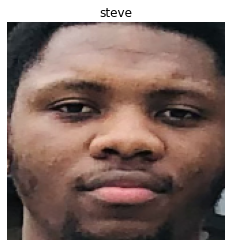

In [39]:
plt.figure()
plt.imshow(x_train_face[101])
plt.title(y_train_face[101])
plt.axis("off")
plt.show()

# <font color='red'>2 - Face embedding : le facenet</font> 

## Comment fonctionne le facenet ?

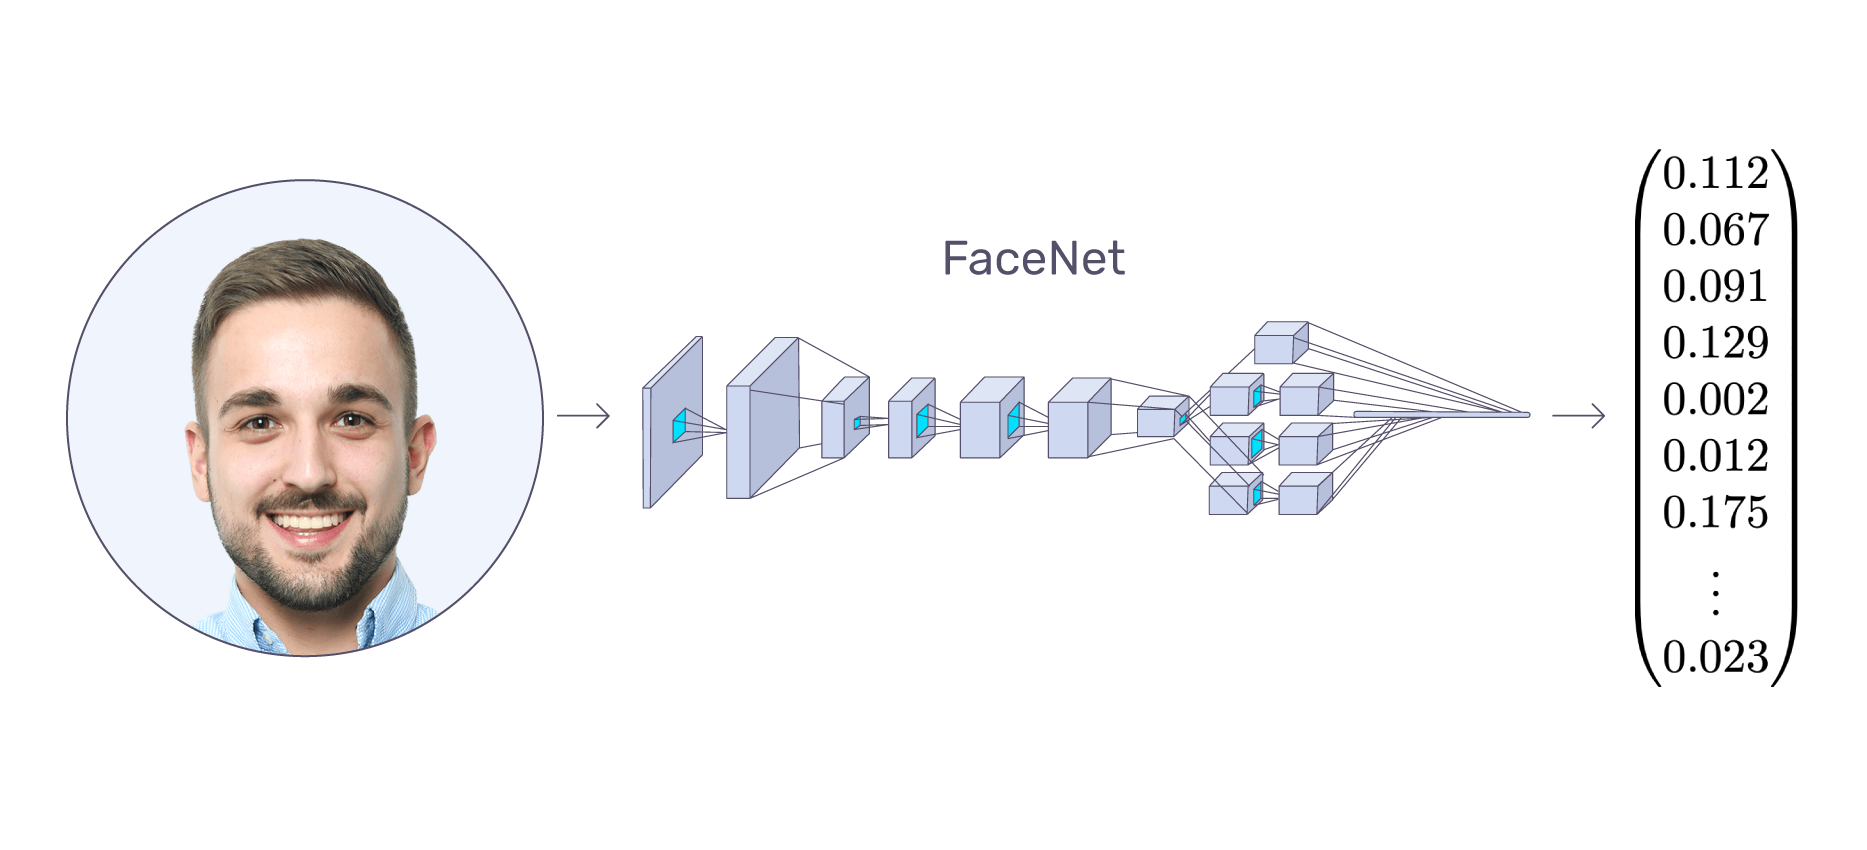

In [97]:
%%HTML
<img src = "media/facenet-brki-ana.png" width="500" height="400"/>

In [96]:
%%HTML
<img src = "media/initial-state.png" width="500" height="400"/>

In [90]:
%%HTML
<video width="800" height="400" controls>
  <source src="media/learning.mp4" type="video/mp4">
</video>

In [40]:
# load the model
facenet = tf.keras.models.load_model('facenet_keras.h5')

print(facenet.inputs)
print(facenet.outputs)

[<tf.Tensor 'input_1_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/batchnorm/add_1:0' shape=(None, 128) dtype=float32>]


In [41]:
facenet.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

Total params: 22,808,144
Trainable params: 22,779,312
Non-trainable params: 28,832
__________________________________________________________________________________________________


In [42]:
def get_embedding(model, face_pixels):
    """
    cette fonction permet d'obtenir les embedding d'un visage en procédant d'abord à la normalisation réquise par le facenet
    """
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    
    # transform face into one sample
    sample = face_pixels[np.newaxis]
    
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

In [43]:
emb_steve = get_embedding(facenet,face_steve)

In [44]:
emb_steve.shape

(128,)

In [ ]:
#nous pouvons desormais enregister les embedding de steve dans notre base de donnée 
#et les utilisés comme référence pour face verification ou face recognition

In [45]:
# convertissons toutes les faces d'entrainement en embedding
x_train_e = list()
for face_pixels in x_train_face:
    embedding = get_embedding(facenet, face_pixels)
    x_train_e.append(embedding)
    
x_train_e = np.asarray(x_train_e)
print(x_train_e.shape)

# convertissons toutes les faces de test en embedding
x_test_e = list()
for face_pixels in x_test_face:
    embedding = get_embedding(facenet, face_pixels)
    x_test_e.append(embedding)
x_test_e = np.asarray(x_test_e)
print(x_test_e.shape)

# save arrays to one file in compressed format
np.savez_compressed('faces-embeddings.npz', x_train_e, y_train_face, x_test_e, y_test_face)

(107, 128)
(31, 128)


In [46]:
# chargeons le dataset
data = np.load('faces-embeddings.npz')
x_train, y_train, x_test, y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Loaded:  (107, 128) (107,) (31, 128) (31,)


# <font color='red'>3 - Face classification : le svc</font> 

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

In [48]:
#normalisons nos labels
out_encoder = LabelEncoder()
y_train = out_encoder.fit_transform(y_train)
y_test = out_encoder.transform(y_test)

y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int64)

In [49]:
out_encoder.classes_

array(['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna',
       'mindy_kaling', 'steve'], dtype='<U14')

In [50]:
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

# predict
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# score
score_train = accuracy_score(y_train, ypred_train)
score_test = accuracy_score(y_test, ypred_test)
# summarize
print('train_accuracy = {:.3f}, test_accuracy = {:.3f}'.format(score_train*100, score_test*100))

train_accuracy = 100.000, test_accuracy = 100.000


In [51]:
print(classification_report(y_test, ypred_test,digits=2,target_names = list(out_encoder.classes_)))

                precision    recall  f1-score   support

    ben_afflek       1.00      1.00      1.00         5
    elton_john       1.00      1.00      1.00         5
jerry_seinfeld       1.00      1.00      1.00         5
       madonna       1.00      1.00      1.00         5
  mindy_kaling       1.00      1.00      1.00         5
         steve       1.00      1.00      1.00         6

      accuracy                           1.00        31
     macro avg       1.00      1.00      1.00        31
  weighted avg       1.00      1.00      1.00        31



In [52]:
x_test_face.shape

(31, 160, 160, 3)

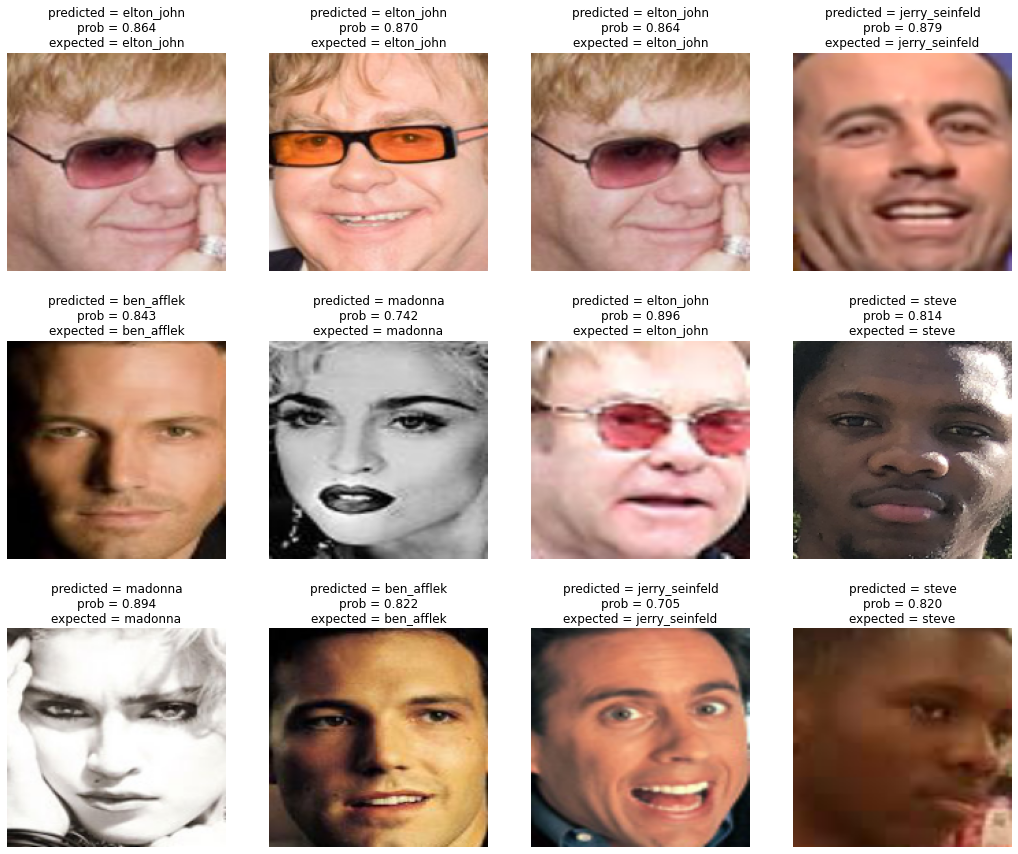

In [53]:
# test model on a random examplfrom the test dataset
selection = np.random.choice([i for i in range(x_test.shape[0])],size = 12)
random_face_pixels = x_test_face[selection]
random_face_emb = x_test[selection]
random_face_class = y_test[selection]
random_face_name = out_encoder.inverse_transform(random_face_class)

# prediction for the face
ypred_class = model.predict(random_face_emb)
ypred_prob = model.predict_proba(random_face_emb)

# get expected name
class_index = ypred_class
class_probability = [ypred_prob[i,x] for i,x in enumerate(ypred_class)] * 100
predict_names = out_encoder.inverse_transform(ypred_class)


# plot
plt.figure(figsize = (18,15))
for i in range(0,len(predict_names)):
    ax = plt.subplot(3,4,i+1)
    plt.axis("off")
    plt.imshow(random_face_pixels[i])
    ax.set_title("predicted = {}\nprob = {:.3f}\nexpected = {}".format(predict_names[i],class_probability[i],random_face_name[i]))
plt.show()

In [54]:
ypred_class

array([1, 1, 1, 2, 0, 3, 1, 5, 3, 0, 2, 5], dtype=int64)

In [55]:
ypred_prob

array([[0.01787694, 0.86352966, 0.01305366, 0.0186817 , 0.04625037,
        0.04060767],
       [0.01280985, 0.86979749, 0.01978694, 0.03150514, 0.03440191,
        0.03169867],
       [0.01787694, 0.86352966, 0.01305366, 0.0186817 , 0.04625037,
        0.04060767],
       [0.0311287 , 0.03452962, 0.87946349, 0.01418684, 0.02379099,
        0.01690036],
       [0.84320088, 0.03619405, 0.02315853, 0.01994695, 0.03285636,
        0.04464323],
       [0.03462296, 0.04547595, 0.02598214, 0.74155812, 0.1279493 ,
        0.02441154],
       [0.01843794, 0.89618094, 0.00834064, 0.01034248, 0.02598043,
        0.04071757],
       [0.02591774, 0.05020706, 0.02026457, 0.02910831, 0.06080458,
        0.81369774],
       [0.01500782, 0.02040651, 0.00616013, 0.89431427, 0.05395401,
        0.01015727],
       [0.82188869, 0.02758893, 0.01703258, 0.02650457, 0.04991262,
        0.05707261],
       [0.03135686, 0.08530784, 0.70504237, 0.04923662, 0.07160724,
        0.05744906],
       [0.01942346, 0

# <font color='red'>4 - Cosine similarity</font> 

In [56]:
def angle(emb_person1,emb_person2):
    alpha = np.sum((emb_person1*emb_person2))/(np.linalg.norm(emb_person1)*np.linalg.norm(emb_person2))
    alpha = (np.arccos(alpha)*180)/np.pi
    
    return alpha

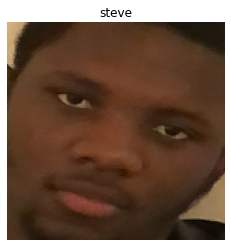

In [57]:
plt.imshow(x_test_face[25])
plt.title(y_test_face[25])
plt.axis("off")
plt.show()

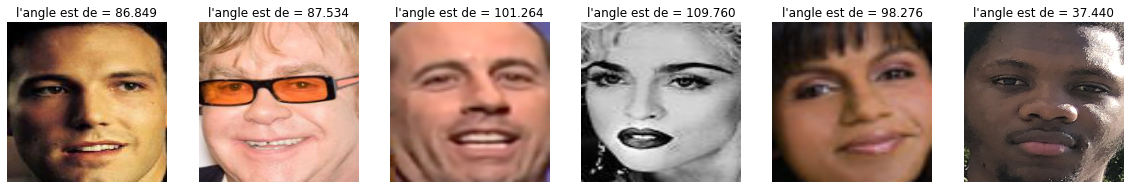

In [58]:
#petit test
plt.figure(figsize = (20,6))
j = 1
for i in [0,5,13,18,24,26]:
    #calcul de l'angle
    alpha = angle(x_test[25],x_test[i])
    
    ax = plt.subplot(1,6,j)
    j +=1
    
    plt.imshow(x_test_face[i])
    ax.set_title("l'angle est de = {:.3f}".format(alpha))
    plt.axis("off")

In [59]:
#definir le nouveau dataset

#detectons les visages
x_train_cos, y_train_cos = load_dataset('dataset_cos/')

#predisons les embeddings
x_train_emb_cos = list()
for face_pixels in x_train_cos:
    embedding = get_embedding(facenet, face_pixels)
    x_train_emb_cos.append(embedding)
    
x_train_emb_cos = np.asarray(x_train_emb_cos)

httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg

(250, 164, 3)
nous avons chargé 1 photos de ben_afflek
httpiamediaimdbcomimagesMMVBMTAxNDUMzUwOTdeQTJeQWpwZBbWUMDUOTAyNTIVUXCRALjpg.jpg

(317, 214, 3)
nous avons chargé 1 photos de elton_john
httpgraphicsnytimescomimagessectionmoviesfilmographyWireImagejpg.jpg

(244, 161, 3)


nous avons chargé 1 photos de jerry_seinfeld
httpiamediaimdbcomimagesMMVBMTANDQNTAxNDVeQTJeQWpwZBbWUMDIMjQOTYVUXCRALjpg.jpg

(317, 214, 3)
nous avons chargé 1 photos de madonna
httpgonetworthcomwpcontentuploadsthumbsjpg.jpg

(295, 295, 3)
nous avons chargé 1 photos de mindy_kaling
IMG_0354.JPG

(3084, 1965, 3)


nous avons chargé 1 photos de steve


In [60]:
x_train_emb_cos.shape

(6, 128)

In [17]:
test = "adp,k"
test[1:-1]

'dp,'

In [22]:
import numpy as np

x = np.array([1.1,0.255,-0.2533,-1.0232])
print(x.shape)

(4,)


In [51]:
array_string = '[ 8.77417326e-07,-4.09070671e-01]'

In [52]:
a =array_string[1:-1].split(",")

In [53]:
b =[float(elt) for elt in a]
np.array(b)

array([ 8.77417326e-07, -4.09070671e-01])

In [47]:
sd = list()
sd.append(b)
sd

[[1.1, 0.255, -0.2533, -1.0232]]

In [38]:
def fromStringArrayToFloatArray(stringArray):
    array = [float(s) for s in stringArray[1:-1].split(',')]
    return np.array(array)

In [44]:
fromStringArrayToFloatArray(array_string).shape

(128,)

In [61]:
def face_verification(emb_person1,emb_person2,treshold = 75):
    alpha = angle(emb_person1,emb_person2)
    print(alpha)
    return int(alpha<treshold)

In [62]:
def face_recognition(emb,emb_connues,nom_connus,treshold = 75):
    angles = list()
    
    for emb_connu in emb_connues:
        angles.append(angle(emb,emb_connu))
        
    if min(angles)<treshold:
        return nom_connus[np.argmin(angles)]
    else:
        return "inconnu"

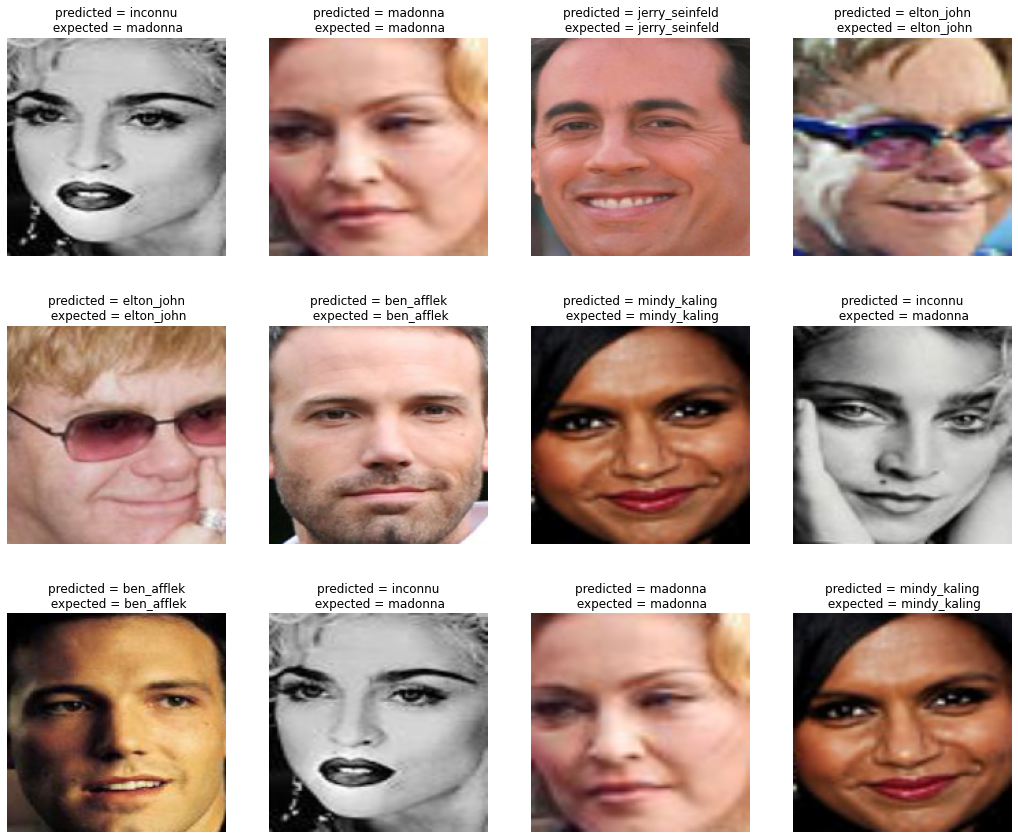

In [63]:
# test model on a random examplfrom the test dataset
selection = np.random.choice([i for i in range(x_test.shape[0])],size = 12)
random_face_pixels = x_test_face[selection]
random_face_emb = x_test[selection]
random_face_class = y_test[selection]
random_face_name = out_encoder.inverse_transform(random_face_class)

predict_names = [face_recognition(x,x_train_emb_cos,y_train_cos) for x in random_face_emb]


# plot
plt.figure(figsize = (18,15))
for i in range(0,len(predict_names)):
    ax = plt.subplot(3,4,i+1)
    plt.axis("off")
    plt.imshow(random_face_pixels[i])
    ax.set_title("predicted = {}\n expected = {}".format(predict_names[i],random_face_name[i]))
plt.show()

In [ ]:
#testons notre modèle avec 2 personnes qui se ressemblent (mon petit frère et moi)

In [64]:
face_steve = extract_face('img.jpg')
face_daniel= extract_face('daniel.jpg')

(406, 326, 3)
(1024, 768, 3)


(-0.5, 159.5, 159.5, -0.5)

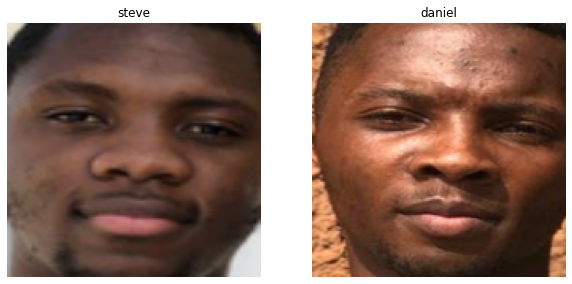

In [65]:
plt.figure(figsize = (10,6))

ax = plt.subplot(1,2,1)
plt.imshow(face_steve)
ax.set_title("steve")
plt.axis("off")

ax = plt.subplot(1,2,2)
plt.imshow(face_daniel)
ax.set_title("daniel")
plt.axis("off")


In [66]:
emb_steve = get_embedding(facenet, face_steve)
emb_daniel = get_embedding(facenet, face_daniel)

In [67]:
face_verification(emb_steve,emb_daniel)

53.203358973747875


0

In [31]:
#donc le modèle a su faire la différence entre nous

In [68]:
#testons face_recognition sur mon frère
face_recognition(emb_daniel,x_train_emb_cos,y_train_cos)

'inconnu'